In [1]:
import pandas as pd 
import numpy as np
import scipy.spatial
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
revised_Data = pd.read_csv("BSOM_DataSet_revised.csv")

In [3]:
revised_Data.head()

,Random_ID,O1_PI_01,O1_PI_02,O1_PI_03,O1_PI_04,O1_PI_05,O1_PI_06,O1_PI_07,O1_PI_08,O1_PI_09,...,all_PIs_avg_n131,BCR_NBME_final,B2E_NBME_final,O1_O2_NBME,SA_NBME,HA_final,HD_final,CBSE_01,CBSE_02,STEP_1
0,1008.0,0.90,0.6957,0.6364,0.7143,0.8333,0.8667,0.64,0.6522,0.2941,...,0.6623,0.81,0.83,0.70,0.74,0.82,0.95,42.0,68.0,233.0
1,1170.0,0.70,0.6087,0.7273,0.4762,0.2917,0.5333,0.56,0.4783,0.4118,...,0.6107,0.86,0.89,0.68,0.77,0.76,0.84,44.0,67.0,215.0
2,1292.0,0.75,0.6957,0.8182,0.6190,0.6250,0.7333,0.52,0.9130,0.3529,...,0.6798,0.85,0.86,0.83,0.71,0.90,0.88,41.0,78.0,243.0
3,1307.0,0.95,0.6957,0.7727,0.7619,0.8333,0.8667,0.80,0.6957,0.5882,...,0.7652,0.93,0.94,0.92,0.91,0.96,0.91,68.0,91.0,248.0
4,1311.0,0.80,0.6522,0.7727,0.6667,0.5417,0.6667,0.76,0.7391,0.6471,...,0.6772,0.88,0.83,0.83,0.88,0.88,0.83,57.0,74.0,228.0


In [4]:
specificdata = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final']]
four_featured_Data = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final','all_irats_avg_n34']]
five_featured_Data = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final','all_irats_avg_n34','HA_final']]

In [5]:
X = specificdata.values
X1 = four_featured_Data.values
X2 = five_featured_Data.values



In [6]:
num_of_data, X_features = X.shape
num_of_data, X1_features = X1.shape
num_of_data, X2_features = X2.shape

# Question 3a
1. Randomly initialize Membership matrix
2. Compute centroid
3. Update membership matrix 
4. If previous membership matrix is very close to (upto 10^-4) current, then converge
5. Otherwise Repeat from step 2

i =  34
Centroids while converging: [[0.80679723 0.62840748 0.83491692]
 [0.71539846 0.54668657 0.69773623]
 [0.8750833  0.72888197 0.91805188]]


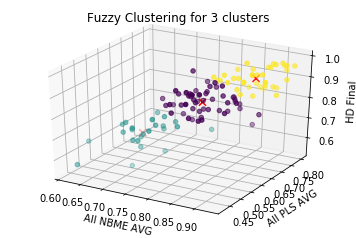

In [15]:
np.random.seed(300)
n_clusters=3
max_iter=100
epsilon = 1e-4
m=2
#Randomnly initialize Membership matrix
mem_fn_Trans = np.random.dirichlet(np.ones(n_clusters),size=num_of_data)
mem_fn = mem_fn_Trans.T

for i in range(max_iter):
    
    #Membership fn power m 
    mem_fn_m = (mem_fn)**m
    
    #Compute centroids
    centroids = mem_fn_m.dot(X)/mem_fn_m.sum(axis=1)[:,None]
    
    #Update membership function
    dist =np.fmax(cdist(centroids, X, metric='euclidean'),np.finfo(np.float64).eps)
    exp = -2. / (m - 1)
    d2 = dist ** exp
    new_mem_fn = d2 / np.sum(d2, axis=0, keepdims=1)

       
    #Check for Convergence 
    if(np.allclose(new_mem_fn,mem_fn)):
        print("i = ",i)
        print("Centroids while converging:",centroids)
        break 
    mem_fn = new_mem_fn    

#Objective function     
min_cost = np.inf
# Compute cost
cost = np.sum((mem_fn**m) * dist)
if cost < min_cost:
    min_cost = cost
    min_centroids = centroids
    mem = (mem_fn**m).argmax(axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.set_xlabel('All NBME AVG')
ax.set_ylabel('All PLS AVG')
ax.set_zlabel('HD Final')
ax.set_title('Fuzzy Clustering for 3 clusters')
ax.scatter3D(x,y,z, c=mem, s=20)
ax.scatter3D(centroids[:,0],centroids[:,1],centroids[:,2],marker='x',color='r', s=50)

# Question 3b Harden the membership values

In [8]:
clusters = mem_fn.argmax(axis=0)
clusters

array([0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 0], dtype=int64)

# Question 3b DB index

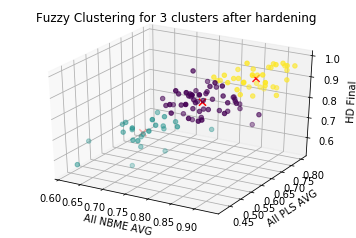

In [16]:
def DaviesBouldin(X, Labels):
    n_cluster = len(np.bincount(Labels)) 
    cluster_k = [X[Labels == k] for k in range(n_cluster)] 
    centroids = [np.mean(k, axis = 0) for k in cluster_k] 
    #dist from all points and centroids within each cluster
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)] 
    
    r = []
    rmax = []
    #Intracluster distance / Intercluster distance 
    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                r.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))
              
        rmax.append(np.max(r))
        r.clear()
        
    #sum of Rij max /num of clusters       
    
    db = (1/n_cluster)*(sum(rmax))
    return(db)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.set_xlabel('All NBME AVG')
ax.set_ylabel('All PLS AVG')
ax.set_zlabel('HD Final')
ax.set_title('Fuzzy Clustering for 3 clusters after hardening ')
ax.scatter3D(x,y,z, c=clusters, s=20)
ax.scatter3D(centroids[:,0],centroids[:,1],centroids[:,2],marker='x',color='r', s=50)

In [19]:
DaviesBouldin(X, clusters)

0.8333976773821119

# Question 3c Add fourth feature 'all_irats_avg_n34'

In [10]:
np.random.seed(1400)
n_clusters=3
max_iter=100
epsilon = 1e-4
m=2
#Randomnly initialize Membership matrix
mem_fn_Trans = np.random.dirichlet(np.ones(n_clusters),size=num_of_data)
mem_fn = mem_fn_Trans.T

for i in range(max_iter):
    
    #Membership fn power m 
    mem_fn_m = (mem_fn)**m
    
    #Compute centroids
    centroids = mem_fn_m.dot(X1)/mem_fn_m.sum(axis=1)[:,None]
    
    #Update membership function
    dist =np.fmax(cdist(centroids, X1, metric='euclidean'),np.finfo(np.float64).eps)
    exp = -2. / (m - 1)
    d2 = dist ** exp
    new_mem_fn = d2 / np.sum(d2, axis=0, keepdims=1)

       
    #Check for Convergence 
    if(np.allclose(new_mem_fn,mem_fn)):
        print("i = ",i)
        print("Centroids while converging:",centroids)
        break 
    mem_fn = new_mem_fn    
clusters4 = mem_fn.argmax(axis=0)

i =  52
Centroids while converging: [[0.71861017 0.54800677 0.70343516 0.61022859]
 [0.80851633 0.6293895  0.83884563 0.6709207 ]
 [0.87622987 0.73160078 0.91368773 0.7663661 ]]


In [11]:
np.random.seed(1400)
n_clusters=3
max_iter=100
epsilon = 1e-4
m=2
#Randomnly initialize Membership matrix
mem_fn_Trans = np.random.dirichlet(np.ones(n_clusters),size=num_of_data)
mem_fn = mem_fn_Trans.T

for i in range(max_iter):
    
    #Membership fn power m 
    mem_fn_m = (mem_fn)**m
    
    #Compute centroids
    centroids = mem_fn_m.dot(X2)/mem_fn_m.sum(axis=1)[:,None]
    
    #Update membership function
    dist =np.fmax(cdist(centroids, X2, metric='euclidean'),np.finfo(np.float64).eps)
    exp = -2. / (m - 1)
    d2 = dist ** exp
    new_mem_fn = d2 / np.sum(d2, axis=0, keepdims=1)

       
    #Check for Convergence 
    if(np.allclose(new_mem_fn,mem_fn)):
        print("i = ",i)
        print("Centroids while converging:",centroids)
        break 
    mem_fn = new_mem_fn    
clusters5 = mem_fn.argmax(axis=0)

i =  53
Centroids while converging: [[0.72588894 0.55334521 0.7112962  0.61153748 0.72253735]
 [0.809192   0.63058761 0.83912302 0.67358615 0.80825959]
 [0.87291441 0.72789489 0.9100846  0.7613731  0.89523522]]


# Question 3c Comparing DB index for various features

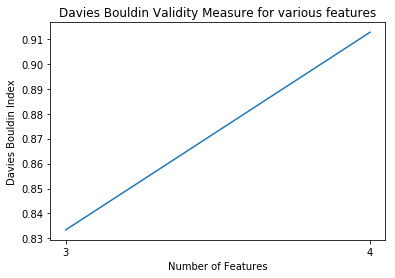

In [18]:

Num_features = [3,4]
Daviesindex_for_features=[]
Daviesindex_for_features.append(DaviesBouldin(X,clusters))
Daviesindex_for_features.append(DaviesBouldin(X1,clusters4))
#Daviesindex_for_features.append(DaviesBouldin(X2,clusters5))
plt.plot(Num_features,Daviesindex_for_features)
plt.xticks([3,4])
plt.xlabel('Number of Features')
plt.ylabel('Davies Bouldin Index')
plt.title('Davies Bouldin Validity Measure for various features')
plt.show()

In [21]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X2[:, :])

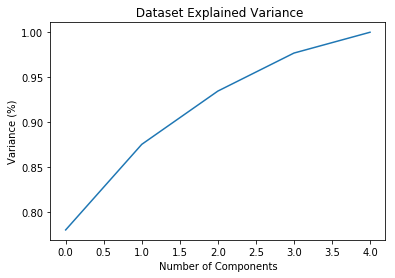

In [27]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(' Dataset Explained Variance')
plt.show()